<a href="https://colab.research.google.com/github/lblabucsd/Zada_Schulze_24/blob/main/plotting_and_stats_pipeline_long_development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

latest update: MLB. JuL23, 2023

# Prep

In [ ]:
# Mount the Google Drive to the Google Colab notebook
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
from google.colab import auth
auth.authenticate_user()

!pip install scikit-posthocs
import math
import time
import os
import sys
import glob
import cv2
import seaborn as sns
import numpy as np
import scikit_posthocs as sp
import pandas as pd
import scipy
import scipy.stats as stats
from scipy.stats import circmean, circvar, circstd
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

sns.set(font_scale=1.5)
sns.set_style("white")

Mounted at /content/drive


In [ ]:
# run this to import & update modules when you make changes in the utils.ipynb
%cd '/content/drive/MyDrive/Zada_Schulze_paper/Colab_notebooks_paper'
%run data_processing_utils.ipynb

/content/drive/MyDrive/Zada_Schulze_paper/Colab_notebooks_paper


In [ ]:
# directories for the data and analysis

experiment_class = 'Behavior_timecourse'
tab_name = 'long_development'

path = '/content/drive/MyDrive/Zada_Schulze_paper/Analysis_output/'+experiment_class+'/'
gsheet = 'https://docs.google.com/spreadsheets/d/1ud4Ifs4Sw3Kth9x_74JBBqgY0MvTXCbLroHDKO8mvQI/edit?usp=sharing'

metadata = read_metadata(gsheet,tab_name)
experiments = metadata.index

figure_savepath = '/content/drive/MyDrive/Zada_Schulze_paper/Figures_output/Development_Long/'

,experiment,exp_type,rig_ver,age,fish_num,fps_Hz,rig_mm,vid_px,trim,wall_pos_px,notes,tracking,habx,video,raw_vid_name,Avg_body_length_mm
0,labels.vDavid_14dpf.000_230505_14dpf_group_0_T...,14dpf,,14dpf,4,120,150,1000,,,,,,,,4
1,labels.vDavid_14dpf.001_230505_14dpf_group_1_T...,14dpf,,14dpf,4,120,150,1000,,,,,,,,4
2,labels.vDavid_14dpf.002_230505_14dpf_group_2_T...,14dpf,,14dpf,4,120,150,1000,,,,,,,,4
3,labels.vDavid_14dpf.003_230505_14dpf_group_3_T...,14dpf,,14dpf,4,120,150,1000,,,,,,,,4
4,labels.vDavid_14dpf.004_230505_14dpf_group_4_T...,14dpf,,14dpf,4,120,150,1000,,,,,,,,4
5,labels.vDavid_18dpf.000_230509_18dpf_group_0_T...,18dpf,,18dpf,4,120,150,1000,,,,,,,,5
6,labels.vDavid_18dpf.001_230509_18dpf_group_1_T...,18dpf,,18dpf,4,120,150,1000,,,,,,,,5
7,labels.vDavid_18dpf.002_230509_18dpf_group_2_T...,18dpf,,18dpf,4,120,150,1000,,,,,,,,5
8,labels.vDavid_18dpf.003_230509_18dpf_group_3_T...,18dpf,,18dpf,4,120,150,1000,,,,,,,,5
9,labels.vDavid_18dpf.004_230509_18dpf_group_4_T...,18dpf,,18dpf,4,120,150,1000,,,,,,,,5


# Main workflow

## Level 0

In [ ]:
# info stored in npz

# lev0_basics.npz: 'exp_type', 'fish_num', int, 'scale' (mm/px)
# 'fps' (Hz), 'f_bodylength_mm','f_bodylength_px'
# 'f_nosex','f_nosey','f_x','f_y','f_tailx','f_taily'
# 'f_heading','f_tail_angle','f_speed','f_ang_speed'

# lev0_neighbor_stats.npz
# 'ff_dist','ff_align':,'f_IID','f_IIA'
# 'f_closest','f_closest_dist','f_closest_align'

# lev1_egomaps_full_experiment.npz
#'occupancy_maps','f_alignment_maps'
#'f_speed_maps', 'f_ang_speed_maps'

labels.vDavid_14dpf.000_230505_14dpf_group_0_Trim.analysis
14dpf 4 0.15 [2.06853926 1.90309239 1.96490073 1.96724211]


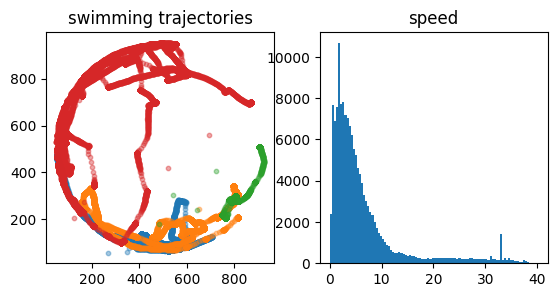

labels.vDavid_14dpf.001_230505_14dpf_group_1_Trim.analysis
14dpf 4 0.15 [1.88348419 2.27639135 1.88071173 2.22281573]


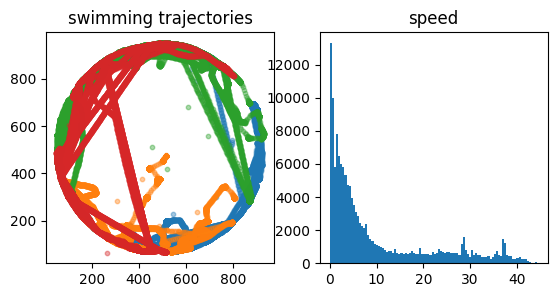

labels.vDavid_14dpf.002_230505_14dpf_group_2_Trim.analysis
14dpf 4 0.15 [2.42916305 2.2392685  2.14612572 1.90973719]


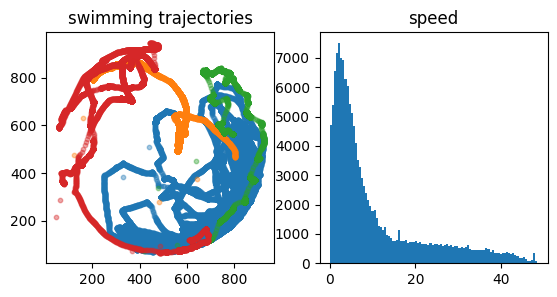

labels.vDavid_14dpf.003_230505_14dpf_group_3_Trim.analysis
14dpf 4 0.15 [2.15798465 2.1264909  2.37131617 2.21140721]


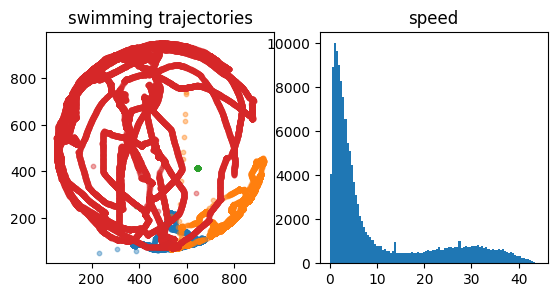

labels.vDavid_14dpf.004_230505_14dpf_group_4_Trim.analysis
14dpf 4 0.15 [2.37174978 2.25158831 2.51346974 2.17568754]


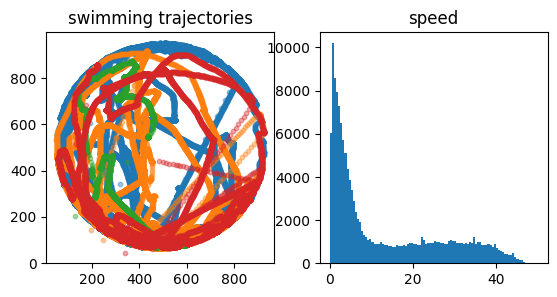

labels.vDavid_18dpf.000_230509_18dpf_group_0_Trim.analysis
18dpf 4 0.15 [1.82291224 1.93917484 2.09876925 2.22777405]


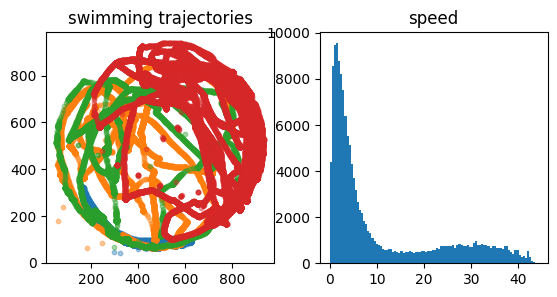

labels.vDavid_18dpf.001_230509_18dpf_group_1_Trim.analysis
18dpf 4 0.15 [2.27441211 2.24231817 2.3445774  2.13851094]


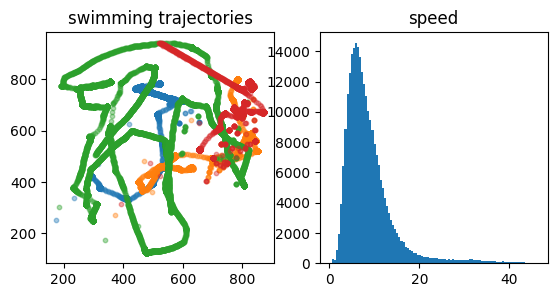

labels.vDavid_18dpf.002_230509_18dpf_group_2_Trim.analysis
18dpf 4 0.15 [2.13992614 2.10591152 2.1122385  2.46634137]


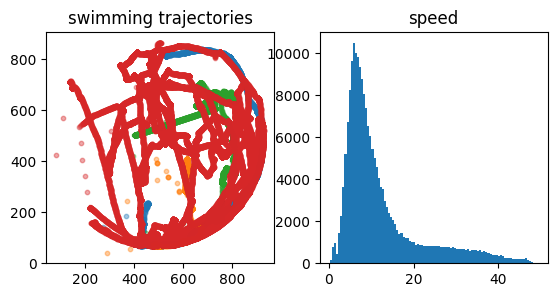

labels.vDavid_18dpf.003_230509_18dpf_group_3_Trim.analysis
18dpf 4 0.15 [2.13295181 2.30123907 2.57619834 2.27993529]


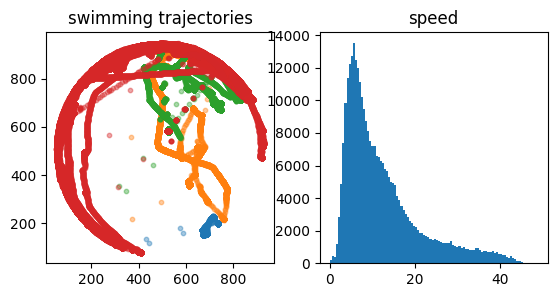

labels.vDavid_18dpf.004_230509_18dpf_group_4_Trim.analysis
18dpf 4 0.15 [2.28500456 2.09450142 2.6089672  2.13016491]


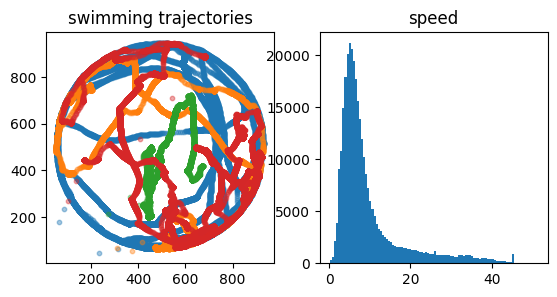

labels.vDavid_21dpf.000_230512_21dpf_group_0_Trim.analysis
21dpf 4 0.3 [5.10189448 4.44430469 4.50174611 5.06579109]


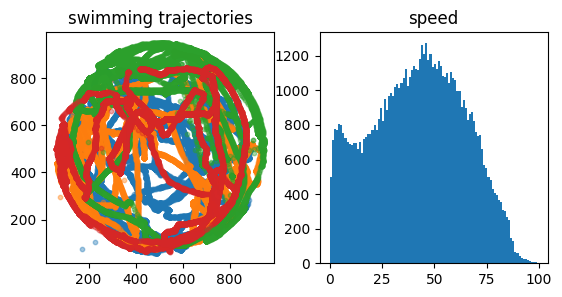

labels.vDavid_21dpf.001_230512_21dpf_group_1_Trim.analysis
21dpf 4 0.3 [4.39564511 4.67268887 4.66378242 4.26025334]


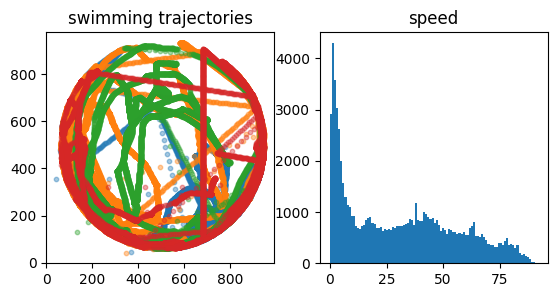

labels.vDavid_21dpf.002_230512_21dpf_group_2_Trim.analysis
21dpf 4 0.3 [3.45703491 4.30500989 4.23216898 4.9787904 ]


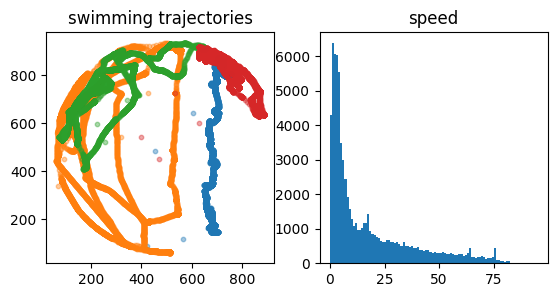

labels.vDavid_21dpf.003_230512_21dpf_group_3_Trim.analysis
21dpf 4 0.3 [4.94919965 3.60717836 4.21190606 4.66101863]


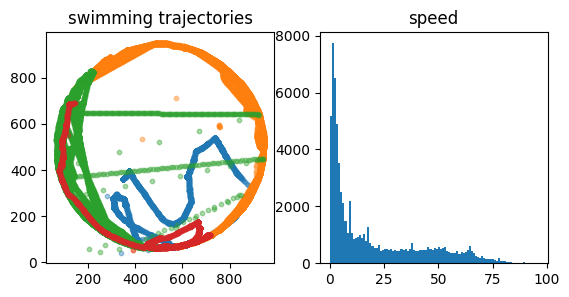

labels.vDavid_21dpf.004_230512_21dpf_group_4_Trim.analysis
21dpf 4 0.3 [4.87002056 4.06423815 3.60768855 4.04433568]


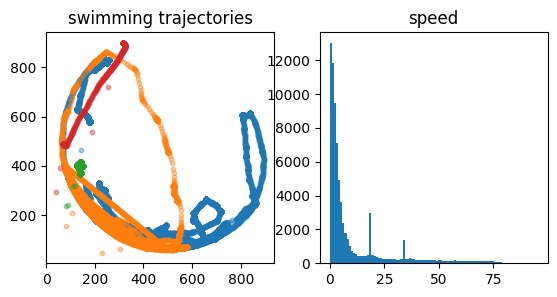

labels.vDavid_25dpf.000_230516_25dpf_group_0_Trim.analysis
25dpf 4 0.3 [3.33598885 3.38649794 3.28616044 3.36464807]


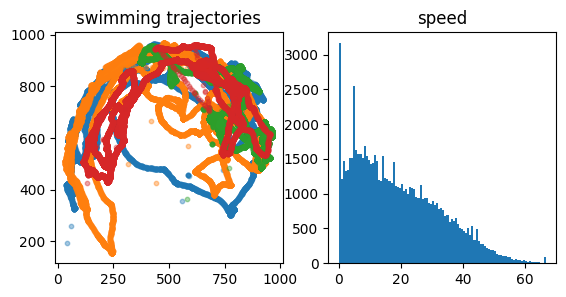

labels.vDavid_25dpf.001_230516_25dpf_group_1_Trim.analysis
25dpf 4 0.3 [2.62832781 2.85666888 2.74843929 2.7694582 ]


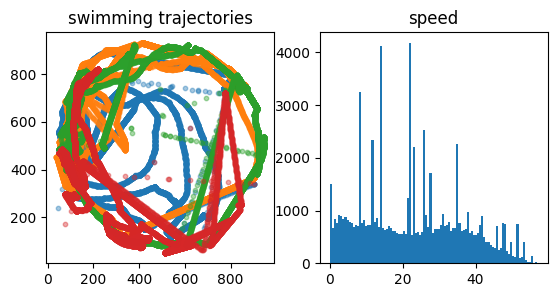

labels.vDavid_25dpf.002_230516_25dpf_group_2_Trim.analysis
25dpf 4 0.3 [3.67995793 3.65849325 3.49874789 3.19347744]


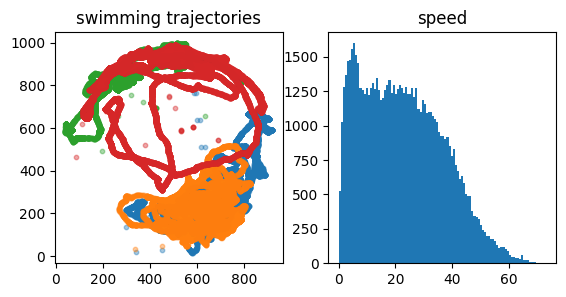

labels.vDavid_25dpf.003_230516_25dpf_group_3_Trim.analysis
25dpf 4 0.3 [3.08750119 3.49578652 3.05960455 2.98502212]


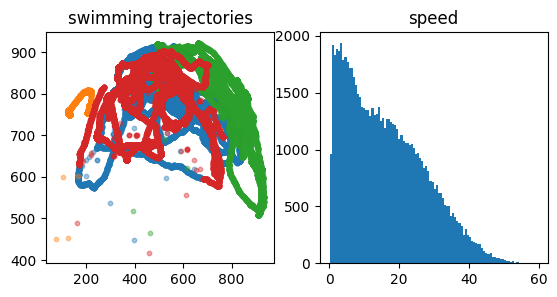

labels.vDavid_25dpf.004_230516_25dpf_group_4_Trim.analysis
25dpf 4 0.3 [3.90024697 4.24717295 3.31310241 4.32783534]


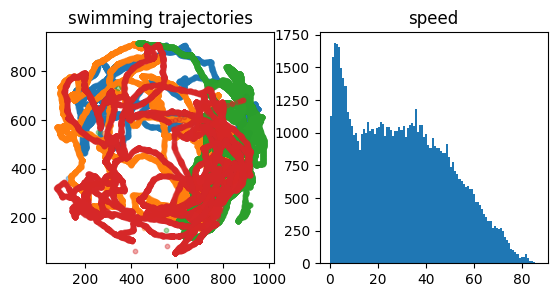

labels.vDavid_28dpf.000_230519_28dpf_group_0_Trim.analysis
28dpf 4 0.3 [3.28956189 3.21266074 2.991049   3.10040971]


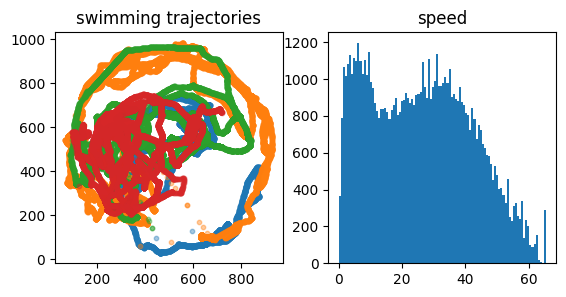

labels.vDavid_28dpf.001_230519_28dpf_group_1_Trim.analysis
28dpf 4 0.3 [4.18854185 4.12162122 4.13424923 4.19659011]


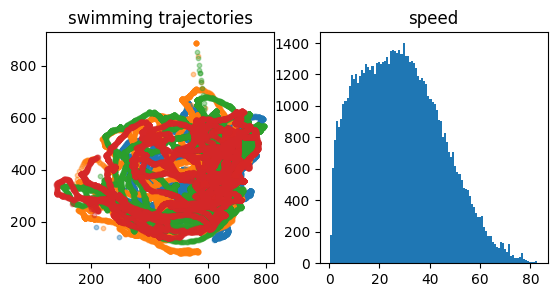

labels.vDavid_28dpf.002_230519_28dpf_group_2_Trim.analysis
28dpf 4 0.3 [3.28888404 3.19564118 3.1340804  2.98637445]


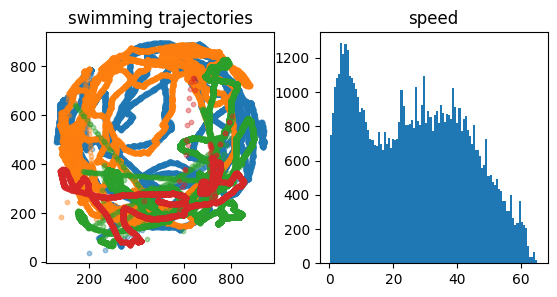

labels.vDavid_28dpf.003_230519_28dpf_group_3_Trim.analysis
28dpf 4 0.3 [3.04515979 3.37546738 3.27088928 4.10955322]


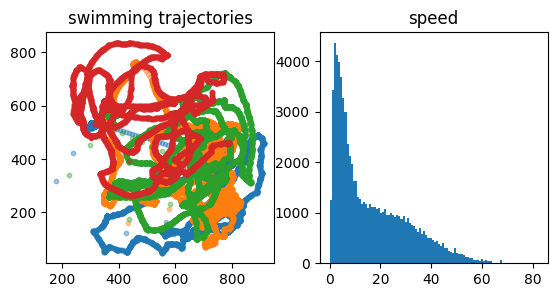

labels.vDavid_28dpf.004_230519_28dpf_group_4_Trim.analysis
28dpf 4 0.3 [3.45085998 3.84794158 3.47909072 3.97918311]


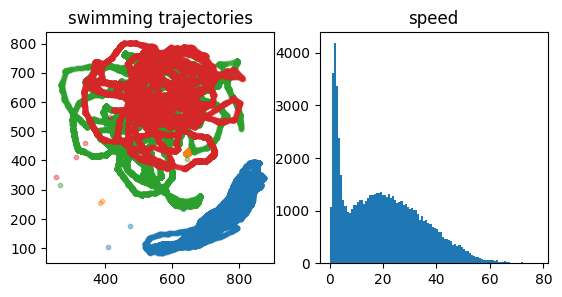

labels.vDavid_32dpf.000_230523_32dpf_group_0_Trim.analysis
32dpf 4 0.3 [4.40310184 4.51539874 3.69711851 3.14182247]


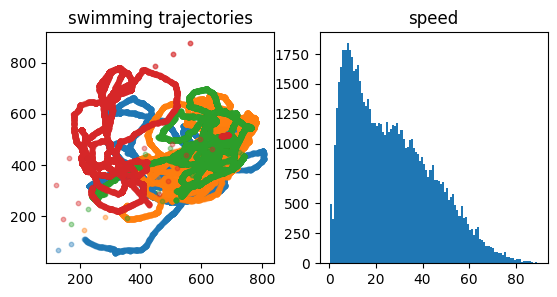

labels.vDavid_32dpf.001_230523_32dpf_group_1_Trim.analysis
32dpf 4 0.3 [4.62487342 4.3825161  4.50517939 4.54706649]


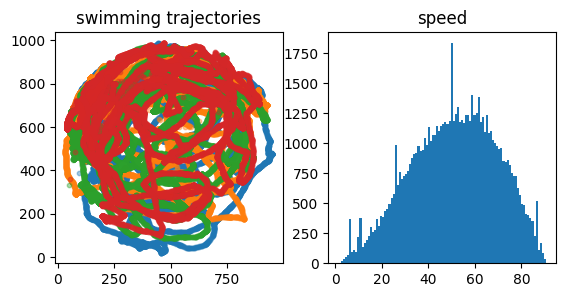

labels.vDavid_32dpf.002_230523_32dpf_group_2_Trim.analysis
32dpf 4 0.3 [3.69789967 4.02833248 4.51985611 3.71928156]


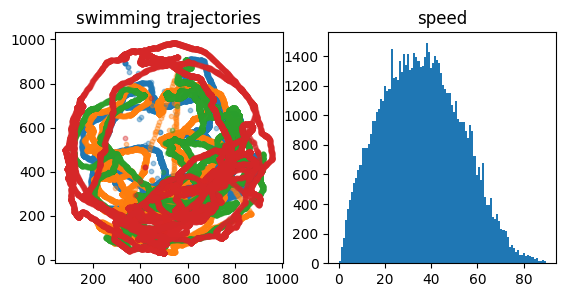

labels.vDavid_32dpf.003_230523_32dpf_group_3_Trim.analysis
32dpf 4 0.3 [3.54569043 3.78425285 4.28040068 3.72376044]


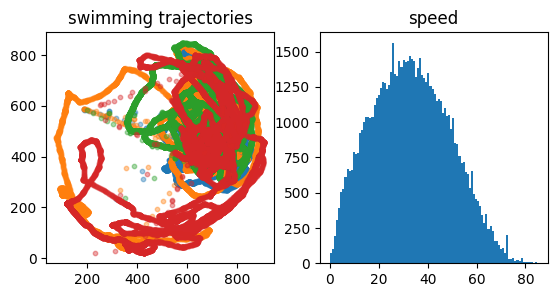

labels.vDavid_32dpf.004_230523_32dpf_group_4_Trim.analysis
32dpf 4 0.3 [3.55137963 4.51003039 3.67587017 3.12208773]


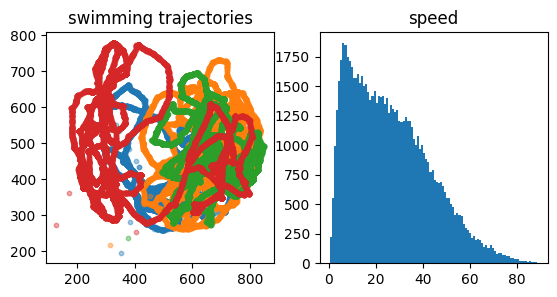

labels.vDavid_35dpf.000_230526_35dpf_group_0_Trim.analysis
35dpf 4 0.3 [3.56749399 3.80452681 3.65621538 3.52291976]


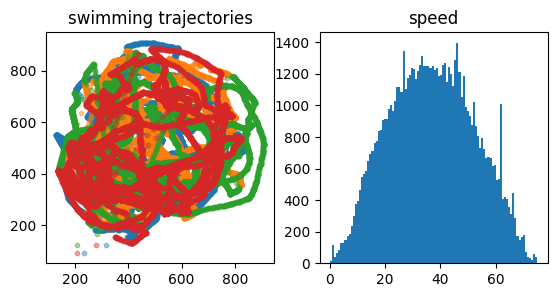

labels.vDavid_35dpf.001_230526_35dpf_group_1_Trim.analysis
35dpf 4 0.3 [4.52240676 4.59659206 4.41755225 4.59369364]


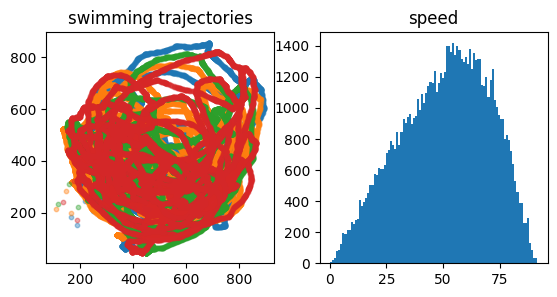

labels.vDavid_35dpf.002_230526_35dpf_group_2_Trim.analysis
35dpf 4 0.3 [3.78078161 4.35743289 4.02099248 4.35118272]


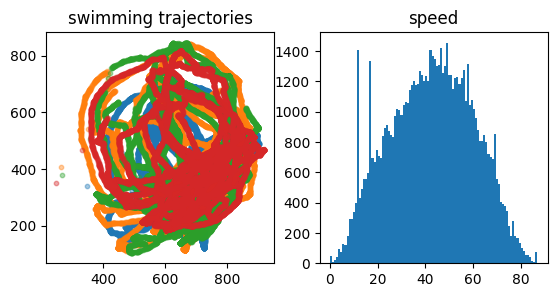

labels.vDavid_35dpf.003_230526_35dpf_group_3_Trim.analysis
35dpf 4 0.3 [4.46999554 4.638759   4.51976703 4.57526039]


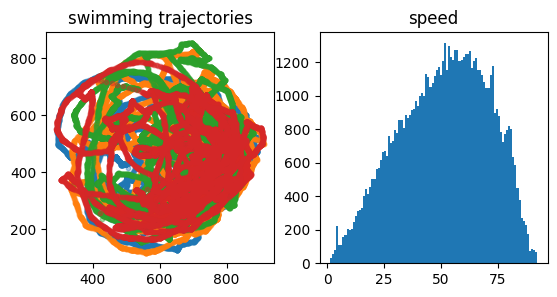

labels.vDavid_35dpf.004_230526_35dpf_group_4_Trim.analysis
35dpf 4 0.3 [3.79992282 3.50386892 4.33955086 4.40195383]


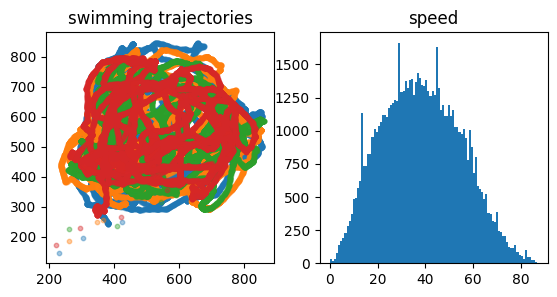

labels.vDavid_39dpf.000_230530_39dpf_group_0_Trim.analysis
39dpf 4 0.3 [4.61934604 4.53920346 4.59533662 4.72584045]


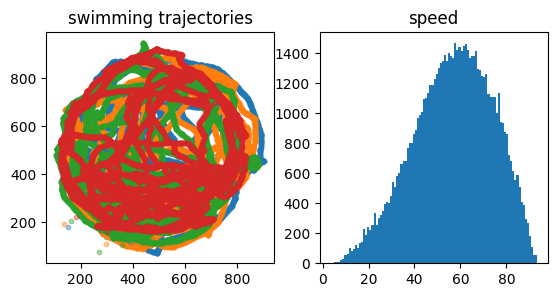

labels.vDavid_39dpf.001_230530_39dpf_group_1_Trim.analysis
39dpf 4 0.3 [4.74534998 4.85137752 4.87103205 5.06193209]


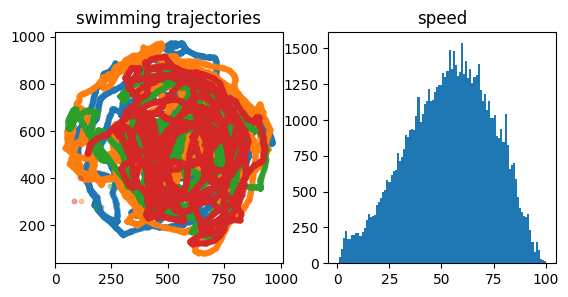

labels.vDavid_39dpf.002_230530_39dpf_group_2_Trim.analysis
39dpf 4 0.3 [4.25750624 4.27095422 4.40023772 4.2259145 ]


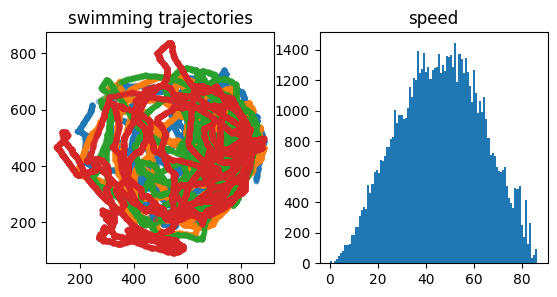

labels.vDavid_39dpf.003_230530_39dpf_group_3_Trim.analysis
39dpf 4 0.3 [4.22908336 4.31590805 4.24988274 3.97557673]


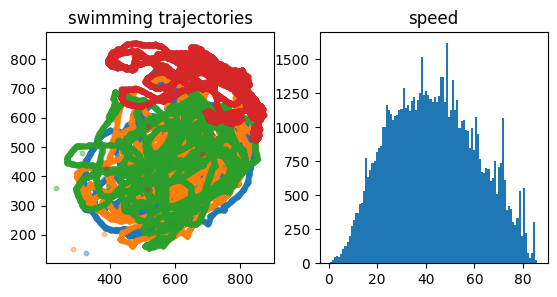

labels.vDavid_39dpf.004_230530_39dpf_group_4_Trim.analysis
39dpf 4 0.3 [4.30796993 4.33804945 4.27618424 4.40279747]


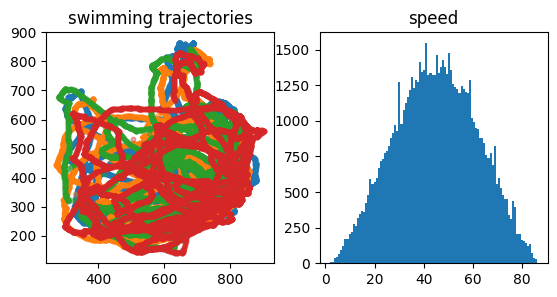

labels.vDavid_42dpf.000_230602_42dpf_group_0_Trim.analysis
42dpf 4 0.3 [4.50632986 4.50321416 4.33945496 4.20900845]


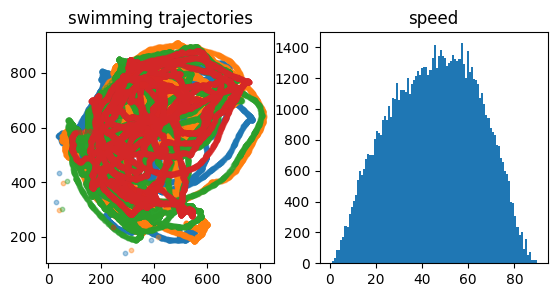

labels.vDavid_42dpf.001_230602_42dpf_group_1_Trim.analysis
42dpf 4 0.3 [4.47846029 4.64292673 4.71734796 4.61939042]


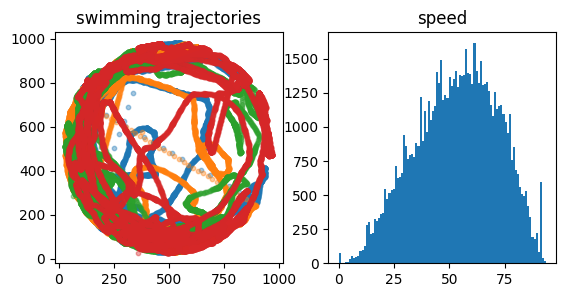

labels.vDavid_42dpf.002_230602_42dpf_group_2_Trim.analysis
42dpf 4 0.3 [4.50572614 4.47420695 4.5021406  4.48354278]


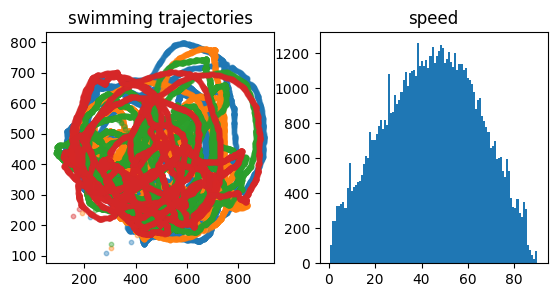

labels.vDavid_42dpf.003_230602_42dpf_group_3_Trim.analysis
42dpf 4 0.3 [4.19605416 4.23547992 4.47844608 3.97647165]


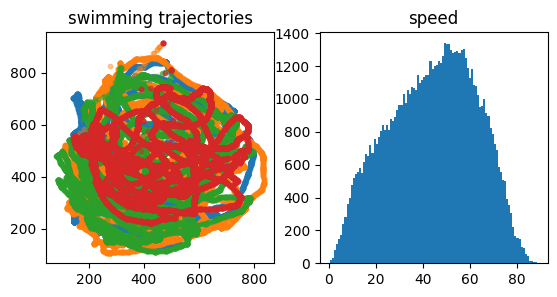

labels.vDavid_42dpf.004_230602_42dpf_group_4_Trim.analysis
42dpf 4 0.3 [4.54987456 4.56971543 4.48649719 4.50382736]


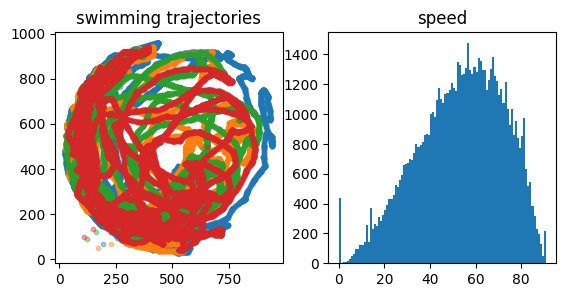

In [ ]:
# from traitlets.config.configurable import SingletonConfigurable
# loop through all experiment in the log

for exp in experiments:
  if os.path.isfile(path + exp + '/' + exp + '_lev0_basics.npz') == True:
    print(str(exp))

    # access analysis folder with npz and get the info
    folder = path + exp + '/'

    data = np.load(folder + exp + '_lev0_basics.npz')
    fish_num, scale, bodylength = data['fish_num'], data['scale'], data['f_bodylength_mm']
    exp_type, f_x, f_y = data['exp_type'], data['f_x'], data['f_y']
    f_heading, f_speed = data['f_heading'], data['f_speed']*scale

    data = np.load(folder + exp + '_lev0_neighbor_stats.npz')
    f_IID, f_IIA = data['f_IID']*scale,data['f_IIA']
    f_closest_dist,f_closest_align = data['f_closest_dist']*scale,data['f_closest_align']

    print(exp_type, fish_num, scale, bodylength)

    plt.figure(figsize=[10,3])
    plt.subplot(131)
    for f in range(fish_num):
      #plt.plot(f_x[f][0:120*60*5],f_y[f][0:120*60*5],alpha=.75)
      plt.scatter(f_x[f],f_y[f],alpha=0.4, s=10)
    plt.title('swimming trajectories')

    plt.subplot(132)
    tmp=[]
    for f in range(fish_num):
      [tmp.append(x) for x in f_speed[f]]
    plt.hist(tmp, bins=100)
    plt.title('speed')

    plt.show()



#descriptive stats to compare across ages (1-way ANOVAs w/ pairwise posthoc comparison). (on a per-fish or group basis)

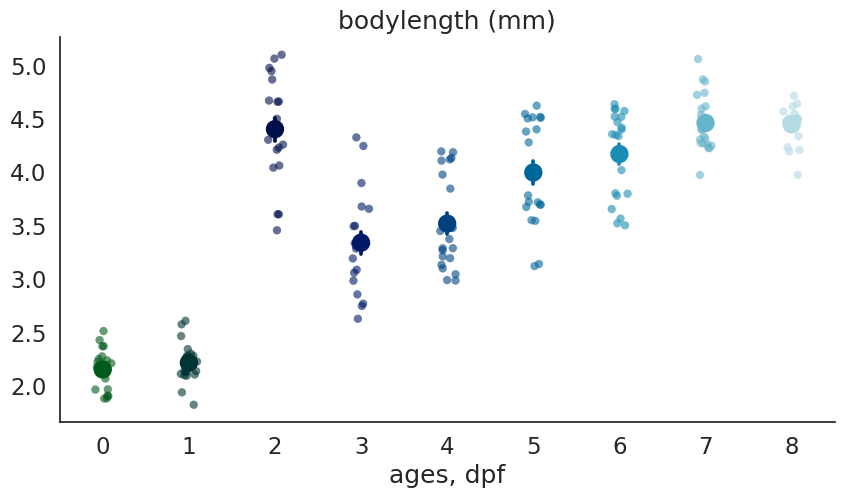

statistics for comparison: Kruskal-Wallis test with posthoc Dunns comparison (bonferroni corrected)
H-statistic:  134.27826887661138 P-value:  3.6657787539884906e-25
              14dpf         18dpf         21dpf     25dpf     28dpf     32dpf  \
14dpf  1.000000e+00  1.000000e+00  1.443542e-10  0.170154  0.049758  0.000003   
18dpf  1.000000e+00  1.000000e+00  4.939187e-10  0.290538  0.090296  0.000007   
21dpf  1.443542e-10  4.939187e-10  1.000000e+00  0.001414  0.006665  1.000000   
25dpf  1.701538e-01  2.905381e-01  1.413751e-03  1.000000  1.000000  0.382236   
28dpf  4.975828e-02  9.029601e-02  6.664736e-03  1.000000  1.000000  1.000000   
32dpf  2.679360e-06  7.016185e-06  1.000000e+00  0.382236  1.000000  1.000000   
35dpf  4.059388e-08  1.200482e-07  1.000000e+00  0.039392  0.137867  1.000000   
39dpf  2.875152e-11  1.022666e-10  1.000000e+00  0.000522  0.002664  1.000000   
42dpf  1.409171e-11  5.097150e-11  1.000000e+00  0.000334  0.001766  1.000000   

              35dpf    

In [ ]:
#PLOT BODYLENGTH
plt.figure(figsize=[10,5])

d14=[]; d18=[]; d21=[]; d25=[]; d28=[]; d32=[]; d35=[]; d39=[]; d42=[];
summary_data = [d14,d18,d21,d25,d28,d32,d35,d39,d42]
ages = ['14dpf', '18dpf', '21dpf', '25dpf', '28dpf', '32dpf', '35dpf', '39dpf', '42dpf']

for exp in experiments:
  if os.path.isfile(path + exp + '/' + exp + '_lev0_basics.npz') == True:
    folder = path + exp + '/'
    data = np.load(folder + exp + '_lev0_basics.npz')
    fish_num, scale, bodylength = data['fish_num'], data['scale'], data['f_bodylength_mm']
    exp_type, f_x, f_y = data['exp_type'], data['f_x'], data['f_y']

    for a,s in zip(ages,summary_data):
      if exp_type==a:
        for i in bodylength:
          s.append(i)

sns.stripplot(data=summary_data, s=6, palette='ocean', jitter=True, alpha=0.6)
sns.pointplot(data=summary_data, estimator='mean',errorbar='se', scale=1.5, palette='ocean', join=False)
plt.xlabel('ages, dpf')
plt.title('bodylength (mm)')
sns.despine()
plt.savefig(figure_savepath +"_bodylength.pdf", transparent=True, bbox_inches='tight', pad_inches=0.2)
plt.show()

print('statistics for comparison: Kruskal-Wallis test with posthoc Dunns comparison (bonferroni corrected)')
data = pd.DataFrame({
    'value': np.concatenate(summary_data),
    'group': np.repeat(ages,
                       repeats=[len(summary_data[n]) for n in range(len(summary_data))])
})

# Kruskal-Wallis test
h_statistic, p_value = stats.kruskal(d14,d18,d21,d25,d28,d32,d35,d39,d42)
print("H-statistic: ", h_statistic, "P-value: ", p_value)

# If p-value < 0.05, we can perform post hoc test (Dunn)
if p_value < 0.05:
    posthoc = sp.posthoc_dunn(data, val_col='value', group_col='group', p_adjust='bonferroni')
    print(posthoc)


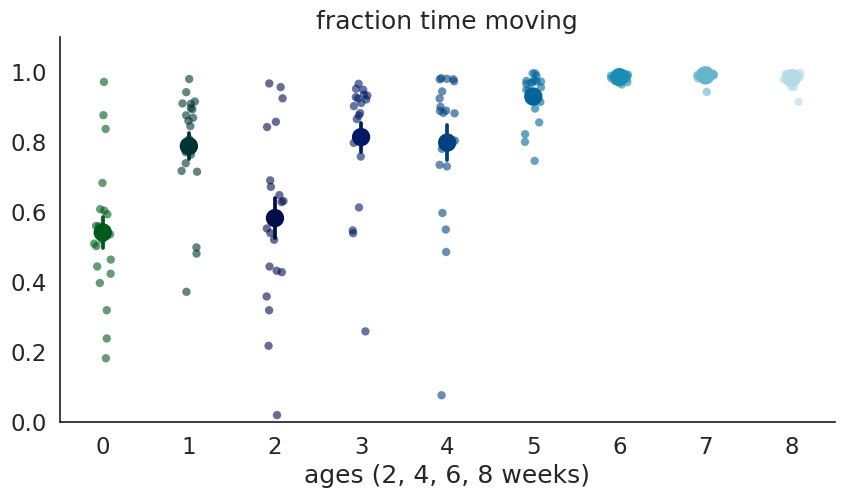

statistics for comparison: Kruskal-Wallis test with posthoc Dunns comparison (bonferroni corrected)
H-statistic:  128.51465930018412 P-value:  5.7470095519832215e-24
              14dpf         18dpf         21dpf     25dpf     28dpf     32dpf  \
14dpf  1.000000e+00  1.000000e+00  1.000000e+00  0.672715  0.375622  0.000401   
18dpf  1.000000e+00  1.000000e+00  1.000000e+00  1.000000  1.000000  0.409735   
21dpf  1.000000e+00  1.000000e+00  1.000000e+00  1.000000  1.000000  0.003261   
25dpf  6.727146e-01  1.000000e+00  1.000000e+00  1.000000  1.000000  1.000000   
28dpf  3.756224e-01  1.000000e+00  1.000000e+00  1.000000  1.000000  1.000000   
32dpf  4.007412e-04  4.097353e-01  3.261485e-03  1.000000  1.000000  1.000000   
35dpf  1.256183e-09  6.931188e-05  2.881709e-08  0.000696  0.001743  0.926079   
39dpf  5.991688e-13  2.235093e-07  2.252456e-11  0.000004  0.000011  0.037334   
42dpf  8.144327e-10  5.044363e-05  1.925032e-08  0.000522  0.001324  0.784311   

              35dpf    

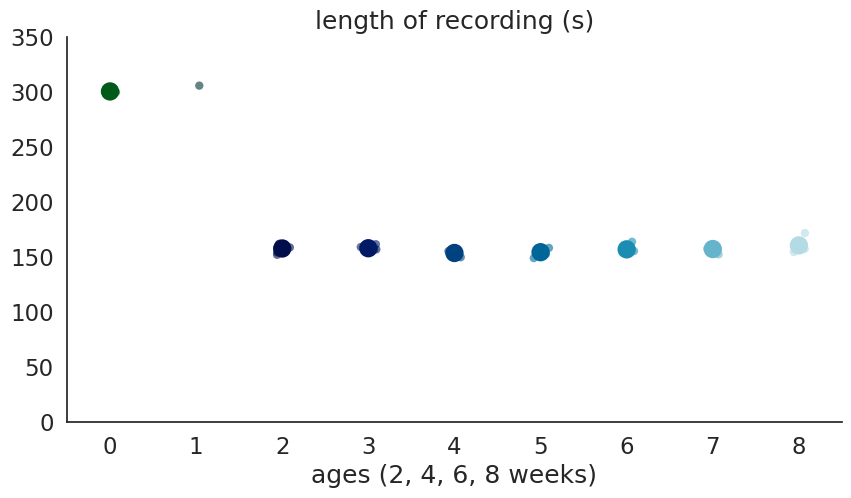

statistics for comparison: Kruskal-Wallis test with posthoc Dunns comparison (bonferroni corrected)
H-statistic:  27.669236344468594 P-value:  0.0005414051396739808
          14dpf     18dpf     21dpf     25dpf     28dpf     32dpf     35dpf  \
14dpf  1.000000  1.000000  1.000000  1.000000  0.024687  0.086874  0.385105   
18dpf  1.000000  1.000000  0.290844  0.335028  0.002307  0.009968  0.057894   
21dpf  1.000000  0.290844  1.000000  1.000000  1.000000  1.000000  1.000000   
25dpf  1.000000  0.335028  1.000000  1.000000  1.000000  1.000000  1.000000   
28dpf  0.024687  0.002307  1.000000  1.000000  1.000000  1.000000  1.000000   
32dpf  0.086874  0.009968  1.000000  1.000000  1.000000  1.000000  1.000000   
35dpf  0.385105  0.057894  1.000000  1.000000  1.000000  1.000000  1.000000   
39dpf  1.000000  0.251951  1.000000  1.000000  1.000000  1.000000  1.000000   
42dpf  1.000000  0.702217  1.000000  1.000000  1.000000  1.000000  1.000000   

          39dpf     42dpf  
14dpf  1.000000 

In [ ]:
#PLOT fraction time moving (more than 2.0 body lengths/s), and video recording time
thresh=2.0

plt.figure(figsize=[10,5])

d14=[]; d18=[]; d21=[]; d25=[]; d28=[]; d32=[]; d35=[]; d39=[]; d42=[];
summary_data = [d14,d18,d21,d25,d28,d32,d35,d39,d42]
ages = ['14dpf', '18dpf', '21dpf', '25dpf', '28dpf', '32dpf', '35dpf', '39dpf', '42dpf']

for exp in experiments:
  if os.path.isfile(path + exp + '/' + exp + '_lev0_basics.npz') == True:
    folder = path + exp + '/'
    data = np.load(folder + exp + '_lev0_basics.npz')
    fish_num, scale, bodylength = data['fish_num'], data['scale'], data['f_bodylength_mm']
    exp_type, f_x, f_y = data['exp_type'], data['f_x'], data['f_y']
    f_heading, f_speed = data['f_heading'], data['f_speed']*scale

    for a,s in zip(ages,summary_data):
      if exp_type==a:
        for i,j in zip(f_speed,bodylength):
          s.append(sum([1 for d in i if d/j > thresh])/len(i))

sns.stripplot(data=summary_data, s=6, palette='ocean', jitter=True, alpha=0.6)
sns.pointplot(data=summary_data, estimator='mean',errorbar='se', scale=1.5, palette='ocean', join=False)
plt.xlabel('ages (2, 4, 6, 8 weeks)')
plt.ylim(0,1.1)
plt.title('fraction time moving')
sns.despine()
plt.savefig(figure_savepath +"_fraction_time_moving.pdf", transparent=True, bbox_inches='tight', pad_inches=0.2)
plt.show()


print('statistics for comparison: Kruskal-Wallis test with posthoc Dunns comparison (bonferroni corrected)')
data = pd.DataFrame({
    'value': np.concatenate(summary_data),
    'group': np.repeat(ages,
                       repeats=[len(summary_data[n]) for n in range(len(summary_data))])
})

# Kruskal-Wallis test
h_statistic, p_value = stats.kruskal(d14,d18,d21,d25,d28,d32,d35,d39,d42)
print("H-statistic: ", h_statistic, "P-value: ", p_value)

# If p-value < 0.01, we can perform post hoc test (Dunn)
if p_value < 0.05:
    posthoc = sp.posthoc_dunn(data, val_col='value', group_col='group', p_adjust='bonferroni')
    print(posthoc)


plt.figure(figsize=[10,5])
d14=[]; d18=[]; d21=[]; d25=[]; d28=[]; d32=[]; d35=[]; d39=[]; d42=[];
summary_data = [d14,d18,d21,d25,d28,d32,d35,d39,d42]
ages = ['14dpf', '18dpf', '21dpf', '25dpf', '28dpf', '32dpf', '35dpf', '39dpf', '42dpf']

for exp in experiments:
  if os.path.isfile(path + exp + '/' + exp + '_lev0_basics.npz') == True:
    folder = path + exp + '/'
    data = np.load(folder + exp + '_lev0_basics.npz')
    exp_type, f_x, fps = data['exp_type'], data['f_x'], data['fps']

    for a,s in zip(ages,summary_data):
      if exp_type==a:
        s.append(len(f_x[0])/fps)

sns.stripplot(data=summary_data, s=6, palette='ocean', jitter=True, alpha=0.6)
sns.pointplot(data=summary_data, estimator='mean',errorbar='se', scale=1.5, palette='ocean', join=False)
plt.ylim(0,350)
plt.xlabel('ages (2, 4, 6, 8 weeks)')
plt.title('length of recording (s)')
sns.despine()
plt.savefig(figure_savepath +"_recording_length.pdf", transparent=True, bbox_inches='tight', pad_inches=0.2)
plt.show()

print('statistics for comparison: Kruskal-Wallis test with posthoc Dunns comparison (bonferroni corrected)')
data = pd.DataFrame({
    'value': np.concatenate(summary_data),
    'group': np.repeat(ages,
                       repeats=[len(summary_data[n]) for n in range(len(summary_data))])
})

# Kruskal-Wallis test
h_statistic, p_value = stats.kruskal(d14,d18,d21,d25,d28,d32,d35,d39,d42)
print("H-statistic: ", h_statistic, "P-value: ", p_value)

# If p-value < 0.01, we can perform post hoc test (Dunn)
if p_value < 0.05:
    posthoc = sp.posthoc_dunn(data, val_col='value', group_col='group', p_adjust='bonferroni')
    print(posthoc)

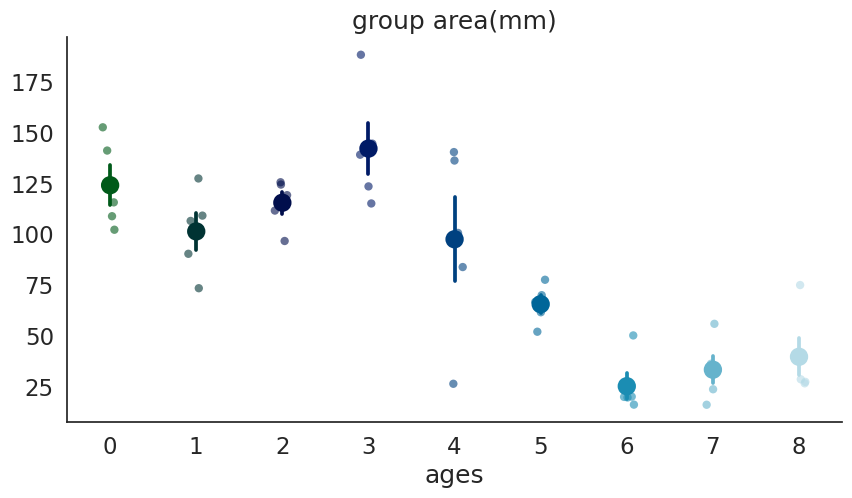

statistics for comparison: Kruskal-Wallis test with posthoc Dunns comparison (bonferroni corrected)
H-statistic:  33.84579710144928 P-value:  4.332499981838112e-05
          14dpf     18dpf     21dpf     25dpf     28dpf     32dpf     35dpf  \
14dpf  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  0.014440   
18dpf  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  0.252152   
21dpf  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  0.041485   
25dpf  1.000000  1.000000  1.000000  1.000000  1.000000  0.442041  0.002087   
28dpf  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  0.335279   
32dpf  1.000000  1.000000  1.000000  0.442041  1.000000  1.000000  1.000000   
35dpf  0.014440  0.252152  0.041485  0.002087  0.335279  1.000000  1.000000   
39dpf  0.068280  0.850321  0.174493  0.012019  1.000000  1.000000  1.000000   
42dpf  0.217974  1.000000  0.505956  0.045138  1.000000  1.000000  1.000000   

          39dpf     42dpf  
14dpf  0.068280  

In [ ]:
#PLOT Group area
plt.figure(figsize=[10,5])

d14=[]; d18=[]; d21=[]; d25=[]; d28=[]; d32=[]; d35=[]; d39=[]; d42=[];
summary_data = [d14,d18,d21,d25,d28,d32,d35,d39,d42]
ages = ['14dpf', '18dpf', '21dpf', '25dpf', '28dpf', '32dpf', '35dpf', '39dpf', '42dpf']

for exp in experiments:
  if os.path.isfile(path + exp + '/' + exp + '_lev0_basics.npz') == True:
    folder = path + exp + '/'
    data = np.load(folder + exp + '_lev0_basics.npz')
    fish_num, scale, bodylength = data['fish_num'], data['scale'], data['f_bodylength_mm']
    exp_type, f_x, f_y = data['exp_type'], data['f_x'], data['f_y']
    f_heading, f_speed = data['f_heading'], data['f_speed']*scale
    data = np.load(folder + exp + '_lev0_neighbor_stats.npz')
    group_area = data['group_area']*scale

    for a,s in zip(ages,summary_data):
      if exp_type==a:
        s.append(np.mean(group_area)/np.mean(bodylength))

sns.stripplot(data=summary_data, s=6, palette='ocean', jitter=True, alpha=0.6)
sns.pointplot(data=summary_data, estimator='mean',errorbar='se', scale=1.5, palette='ocean', join=False)
plt.xlabel('ages')
plt.title('group area(mm)')
sns.despine()
plt.savefig(figure_savepath +"_group_area.pdf", transparent=True, bbox_inches='tight', pad_inches=0.2)
plt.show()


print('statistics for comparison: Kruskal-Wallis test with posthoc Dunns comparison (bonferroni corrected)')
data = pd.DataFrame({
    'value': np.concatenate(summary_data),
    'group': np.repeat(ages,
                       repeats=[len(summary_data[n]) for n in range(len(summary_data))])
})

# Kruskal-Wallis test
h_statistic, p_value = stats.kruskal(d14,d18,d21,d25,d28,d32,d35,d39,d42)
print("H-statistic: ", h_statistic, "P-value: ", p_value)

# If p-value < 0.05, we can perform post hoc test (Dunn)
if p_value < 0.05:
    posthoc = sp.posthoc_dunn(data, val_col='value', group_col='group', p_adjust='bonferroni')
    print(posthoc)


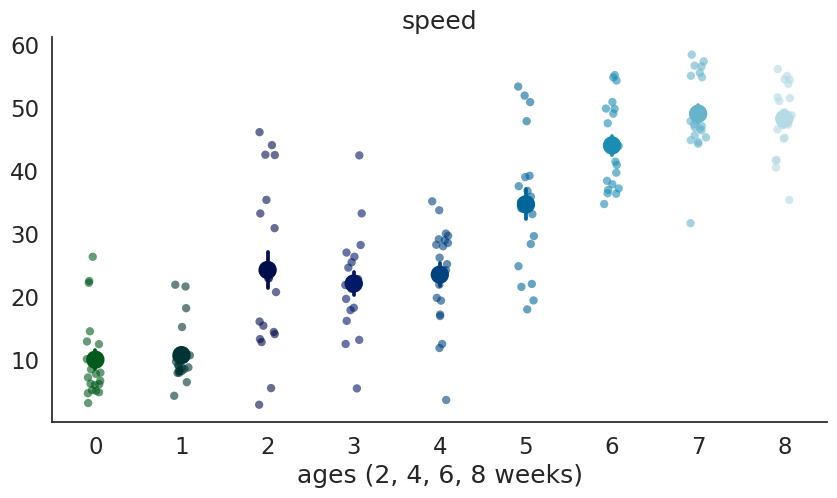

statistics for comparison: Kruskal-Wallis test with posthoc Dunns comparison (bonferroni corrected)
H-statistic:  134.68239410681394 P-value:  3.0218144818326925e-25
              14dpf         18dpf     21dpf     25dpf     28dpf     32dpf  \
14dpf  1.000000e+00  1.000000e+00  0.159206  0.490451  0.195940  0.000044   
18dpf  1.000000e+00  1.000000e+00  0.332112  0.940671  0.402701  0.000145   
21dpf  1.592060e-01  3.321122e-01  1.000000  1.000000  1.000000  1.000000   
25dpf  4.904508e-01  9.406709e-01  1.000000  1.000000  1.000000  0.614672   
28dpf  1.959399e-01  4.027005e-01  1.000000  1.000000  1.000000  1.000000   
32dpf  4.396852e-05  1.453912e-04  1.000000  0.614672  1.000000  1.000000   
35dpf  1.391897e-09  6.968819e-09  0.006050  0.001239  0.004622  1.000000   
39dpf  1.272007e-12  8.020697e-12  0.000081  0.000012  0.000058  0.231508   
42dpf  3.447227e-12  2.106995e-11  0.000152  0.000023  0.000110  0.341038   

              35dpf         39dpf         42dpf  
14dpf  1.3918

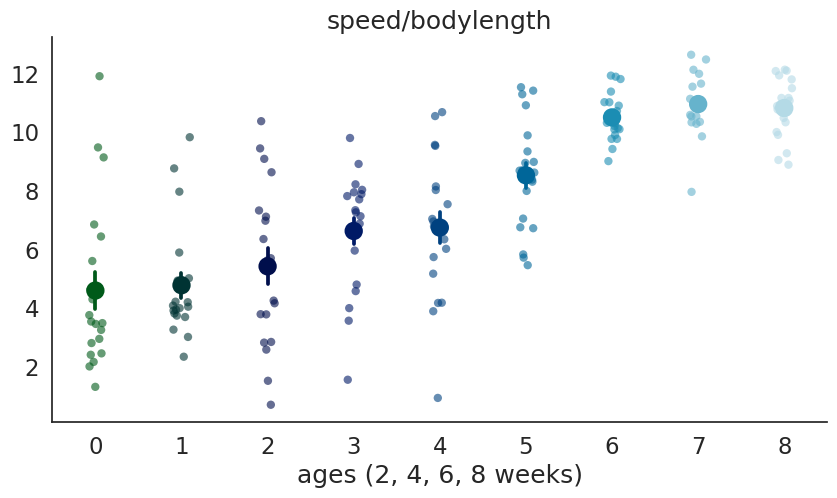

statistics for comparison: Kruskal-Wallis test with posthoc Dunns comparison (bonferroni corrected)
H-statistic:  115.04453038674035 P-value:  3.488143604571259e-21
              14dpf         18dpf         21dpf     25dpf     28dpf     32dpf  \
14dpf  1.000000e+00  1.000000e+00  1.000000e+00  1.000000  1.000000  0.010851   
18dpf  1.000000e+00  1.000000e+00  1.000000e+00  1.000000  1.000000  0.016637   
21dpf  1.000000e+00  1.000000e+00  1.000000e+00  1.000000  1.000000  0.151781   
25dpf  1.000000e+00  1.000000e+00  1.000000e+00  1.000000  1.000000  1.000000   
28dpf  1.000000e+00  1.000000e+00  1.000000e+00  1.000000  1.000000  1.000000   
32dpf  1.085129e-02  1.663677e-02  1.517814e-01  1.000000  1.000000  1.000000   
35dpf  2.359921e-07  4.582517e-07  1.595652e-05  0.001471  0.003886  1.000000   
39dpf  1.969513e-09  4.154829e-09  2.317577e-07  0.000043  0.000133  0.116847   
42dpf  6.438380e-09  1.331764e-08  6.642156e-07  0.000104  0.000311  0.205289   

              35dpf     

In [ ]:
#PLOT SPEED (raw and by bodylength)
plt.figure(figsize=[10,5])

d14=[]; d18=[]; d21=[]; d25=[]; d28=[]; d32=[]; d35=[]; d39=[]; d42=[];
summary_data = [d14,d18,d21,d25,d28,d32,d35,d39,d42]
ages = ['14dpf', '18dpf', '21dpf', '25dpf', '28dpf', '32dpf', '35dpf', '39dpf', '42dpf']

for exp in experiments:
  if os.path.isfile(path + exp + '/' + exp + '_lev0_basics.npz') == True:
    folder = path + exp + '/'
    data = np.load(folder + exp + '_lev0_basics.npz')
    fish_num, scale, bodylength = data['fish_num'], data['scale'], data['f_bodylength_mm']
    exp_type, f_x, f_y = data['exp_type'], data['f_x'], data['f_y']
    f_heading, f_speed = data['f_heading'], data['f_speed']*scale

    for a,s in zip(ages,summary_data):
      if exp_type==a:
        for i in f_speed:
          s.append(np.mean(i))

sns.stripplot(data=summary_data, s=6, palette='ocean', jitter=True, alpha=0.6)
sns.pointplot(data=summary_data, estimator='mean',errorbar='se', scale=1.5, palette='ocean', join=False)
plt.xlabel('ages (2, 4, 6, 8 weeks)')
plt.title('speed')
sns.despine()
plt.savefig(figure_savepath +"_speed.pdf", transparent=True, bbox_inches='tight', pad_inches=0.2)
plt.show()

print('statistics for comparison: Kruskal-Wallis test with posthoc Dunns comparison (bonferroni corrected)')
data = pd.DataFrame({
    'value': np.concatenate(summary_data),
    'group': np.repeat(ages,
                       repeats=[len(summary_data[n]) for n in range(len(summary_data))])
})

# Kruskal-Wallis test
h_statistic, p_value = stats.kruskal(d14,d18,d21,d25,d28,d32,d35,d39,d42)
print("H-statistic: ", h_statistic, "P-value: ", p_value)

# If p-value < 0.01, we can perform post hoc test (Dunn)
if p_value < 0.05:
    posthoc = sp.posthoc_dunn(data, val_col='value', group_col='group', p_adjust='bonferroni')
    print(posthoc)


plt.figure(figsize=[10,5])

d14=[]; d18=[]; d21=[]; d25=[]; d28=[]; d32=[]; d35=[]; d39=[]; d42=[];
summary_data = [d14,d18,d21,d25,d28,d32,d35,d39,d42]
ages = ['14dpf', '18dpf', '21dpf', '25dpf', '28dpf', '32dpf', '35dpf', '39dpf', '42dpf']

for exp in experiments:
  if os.path.isfile(path + exp + '/' + exp + '_lev0_basics.npz') == True:
    folder = path + exp + '/'
    data = np.load(folder + exp + '_lev0_basics.npz')
    fish_num, scale, bodylength = data['fish_num'], data['scale'], data['f_bodylength_mm']
    exp_type, f_x, f_y = data['exp_type'], data['f_x'], data['f_y']
    f_heading, f_speed = data['f_heading'], data['f_speed']*scale

    for a,s in zip(ages,summary_data):
      if exp_type==a:
        for i,j in zip(f_speed,bodylength):
          s.append(np.mean(i)/j)

sns.stripplot(data=summary_data, s=6, palette='ocean', jitter=True, alpha=0.6)
sns.pointplot(data=summary_data, estimator='mean',errorbar='se', scale=1.5, palette='ocean', join=False)
plt.xlabel('ages (2, 4, 6, 8 weeks)')
plt.title('speed/bodylength')
sns.despine()
plt.savefig(figure_savepath +"_speed_bodylength-norm.pdf", transparent=True, bbox_inches='tight', pad_inches=0.2)
plt.show()

print('statistics for comparison: Kruskal-Wallis test with posthoc Dunns comparison (bonferroni corrected)')
data = pd.DataFrame({
    'value': np.concatenate(summary_data),
    'group': np.repeat(ages,
                       repeats=[len(summary_data[n]) for n in range(len(summary_data))])
})

# Kruskal-Wallis test
h_statistic, p_value = stats.kruskal(d14,d18,d21,d25,d28,d32,d35,d39,d42)
print("H-statistic: ", h_statistic, "P-value: ", p_value)

# If p-value < 0.01, we can perform post hoc test (Dunn)
if p_value < 0.05:
    posthoc = sp.posthoc_dunn(data, val_col='value', group_col='group', p_adjust='bonferroni')
    print(posthoc)


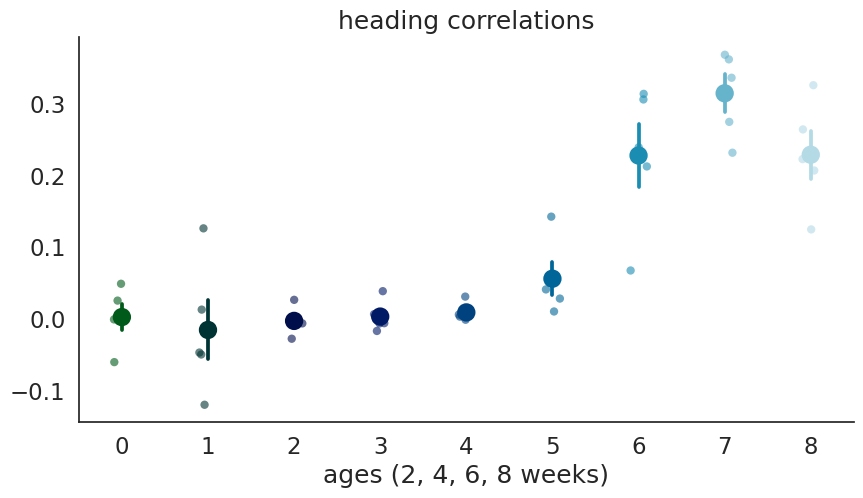

statistics for comparison: Kruskal-Wallis test with posthoc Dunns comparison (bonferroni corrected)
H-statistic:  33.020289855072434 P-value:  6.107198766757512e-05
          14dpf     18dpf     21dpf     25dpf     28dpf  32dpf     35dpf  \
14dpf  1.000000  1.000000  1.000000  1.000000  1.000000    1.0  0.442041   
18dpf  1.000000  1.000000  1.000000  1.000000  1.000000    1.0  0.119146   
21dpf  1.000000  1.000000  1.000000  1.000000  1.000000    1.0  0.094159   
25dpf  1.000000  1.000000  1.000000  1.000000  1.000000    1.0  0.188026   
28dpf  1.000000  1.000000  1.000000  1.000000  1.000000    1.0  0.702651   
32dpf  1.000000  1.000000  1.000000  1.000000  1.000000    1.0  1.000000   
35dpf  0.442041  0.119146  0.094159  0.188026  0.702651    1.0  1.000000   
39dpf  0.062923  0.013178  0.009982  0.022630  0.110215    1.0  1.000000   
42dpf  0.540873  0.150036  0.119146  0.234503  0.850321    1.0  1.000000   

          39dpf     42dpf  
14dpf  0.062923  0.540873  
18dpf  0.013178  0

In [ ]:
#PLOT angle correlations (one average value across the group)

plt.figure(figsize=[10,5])

d14=[]; d18=[]; d21=[]; d25=[]; d28=[]; d32=[]; d35=[]; d39=[]; d42=[];
summary_data = [d14,d18,d21,d25,d28,d32,d35,d39,d42]
ages = ['14dpf', '18dpf', '21dpf', '25dpf', '28dpf', '32dpf', '35dpf', '39dpf', '42dpf']

for exp in experiments:
  if os.path.isfile(path + exp + '/' + exp + '_lev0_basics.npz') == True:
    folder = path + exp + '/'
    data = np.load(folder + exp + '_lev0_basics.npz')
    fish_num, scale, bodylength = data['fish_num'], data['scale'], data['f_bodylength_mm']
    exp_type, f_x, f_y = data['exp_type'], data['f_x'], data['f_y']
    f_heading, f_speed = data['f_heading'], data['f_speed']*scale

    for a,s in zip(ages,summary_data):
      if exp_type==a:
        data = np.vstack(f_heading)
        corr_matrix = np.corrcoef(data)
        off_diagonal_elements = corr_matrix[np.triu_indices_from(corr_matrix, k=1)]
        s.append(np.mean(off_diagonal_elements))

sns.stripplot(data=summary_data, s=6, palette='ocean', jitter=True, alpha=0.6)
sns.pointplot(data=summary_data, estimator='mean',errorbar='se', scale=1.5, palette='ocean', join=False)
plt.xlabel('ages (2, 4, 6, 8 weeks)')
plt.title('heading correlations')
sns.despine()
plt.savefig(figure_savepath +"_heading_direction_correlations.pdf", transparent=True, bbox_inches='tight', pad_inches=0.2)
plt.show()

print('statistics for comparison: Kruskal-Wallis test with posthoc Dunns comparison (bonferroni corrected)')
data = pd.DataFrame({
    'value': np.concatenate(summary_data),
    'group': np.repeat(ages,
                       repeats=[len(summary_data[n]) for n in range(len(summary_data))])
})

# Kruskal-Wallis test
h_statistic, p_value = stats.kruskal(d14,d18,d21,d25,d28,d32,d35,d39,d42)
print("H-statistic: ", h_statistic, "P-value: ", p_value)

# If p-value < 0.01, we can perform post hoc test (Dunn)
if p_value < 0.05:
    posthoc = sp.posthoc_dunn(data, val_col='value', group_col='group', p_adjust='bonferroni')
    print(posthoc)
